# Regresion Logistica

- Ricardo Méndez 21289
- Sara Echeverría 21371
- Sebastián Juárez 21471
- Repositorio de Github: https://github.com/bl33h/logisticRegression

# Análisis exploratorio

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
file = "../data/train.csv"
df = pd.read_csv(file)

In [3]:
df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


## ¿Cuál es la distribución de precios de venta? ¿Es simétrica o sesgada hacia algún lado?

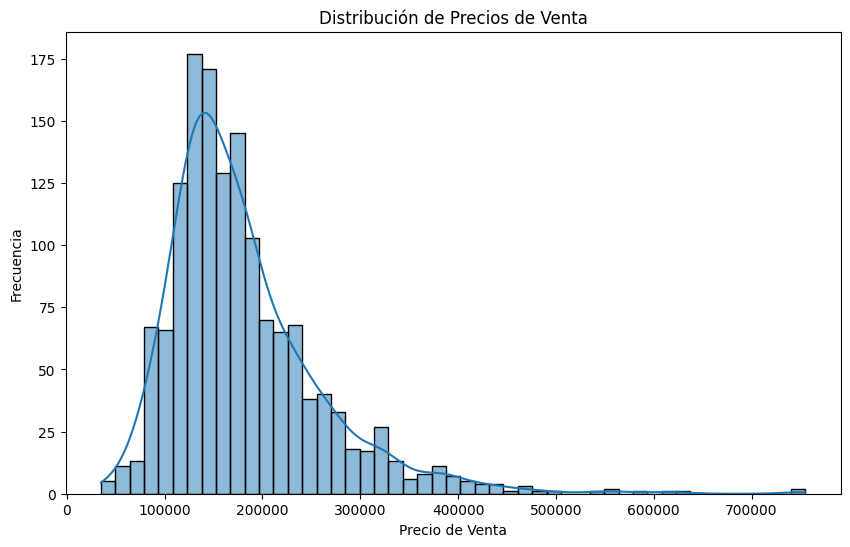

In [4]:
plt.figure(figsize=(10, 6))
sns.histplot(df['SalePrice'], kde=True)
plt.title('Distribución de Precios de Venta')
plt.xlabel('Precio de Venta')
plt.ylabel('Frecuencia')
plt.show()

#### Vemos que la grafica tiene buena distribución aunque viendo mas detenidamente podemos ver que la grafica contiene algunos datos atípicos que pueden modificar el entrenamiento de los modelos de regresion si es que no se manejan de manera correcta. Se podria revisar algunos de estos datos para saber con mayor certeza si estos datos son importantes para nuestro análisis

## ¿Cómo se correlaciona el precio de venta con otras variables numéricas, como el tamaño del lote, el área habitable, el número de habitaciones?

In [5]:
numeric_vars = ['LotArea', 'GrLivArea', 'TotRmsAbvGrd']
correlation_matrix = df[['SalePrice'] + numeric_vars].corr()
print("Matriz de correlación con variables numéricas:\n", correlation_matrix)

Matriz de correlación con variables numéricas:
               SalePrice   LotArea  GrLivArea  TotRmsAbvGrd
SalePrice      1.000000  0.263843   0.708624      0.533723
LotArea        0.263843  1.000000   0.263116      0.190015
GrLivArea      0.708624  0.263116   1.000000      0.825489
TotRmsAbvGrd   0.533723  0.190015   0.825489      1.000000


#### Viendo esta matriz de correlación podemos ver como es que se relacionan algunas variables con la que estamos tratando de predecir, y de estas podemos resaltar que la variable mas cercana a SalePrice es la de GrLivArea, por lo que podriamos enfocar nuestra atencion a esta en el entrnamiento

## ¿Cómo varía el precio de venta en función de variables categóricas como el tipo de zona de zonificación, la ubicación del vecindario, la calidad general de la vivienda?

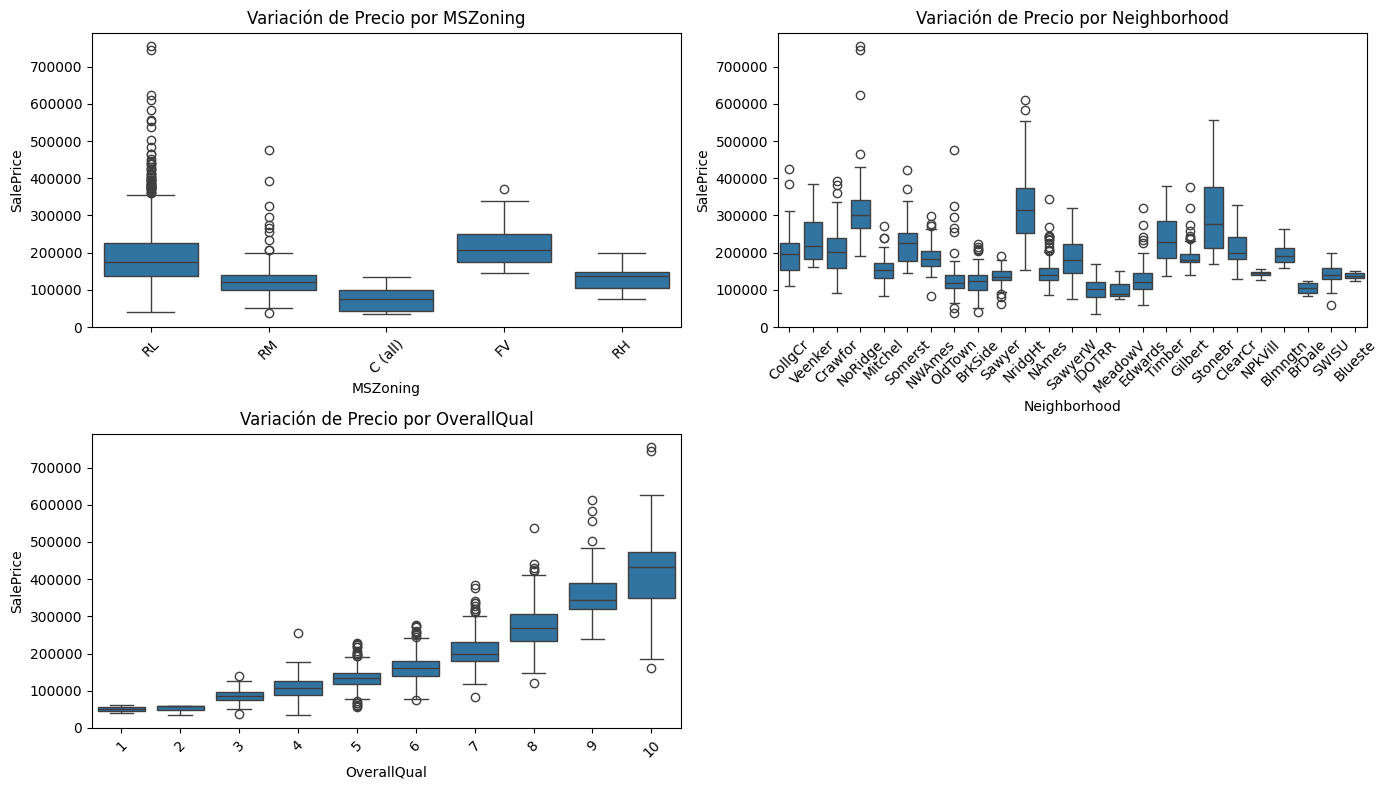

In [6]:
categorical_vars = ['MSZoning', 'Neighborhood', 'OverallQual']
plt.figure(figsize=(14, 8))
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=var, y='SalePrice', data=df)
    plt.title(f'Variación de Precio por {var}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### En estas graficas podemos ver algunos datos que tan bien distribuidos estan. Vemos como es que en cada grafica se presentan una gran cantidad de datos atipicos, por lo que una buena clasificacion de variables y su limpieza, podrian resultar beneficiosas en el modelado

## ¿Hay alguna relación evidente entre el precio de venta y el año de construcción o el año de remodelación?

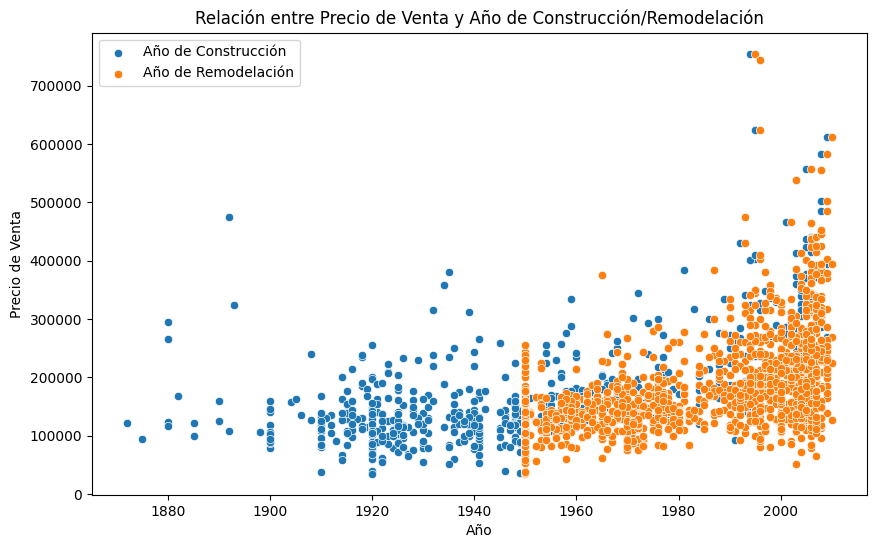

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='YearBuilt', y='SalePrice', data=df, label='Año de Construcción')
sns.scatterplot(x='YearRemodAdd', y='SalePrice', data=df, label='Año de Remodelación')
plt.title('Relación entre Precio de Venta y Año de Construcción/Remodelación')
plt.xlabel('Año')
plt.ylabel('Precio de Venta')
plt.legend()
plt.show()

## ¿Hay alguna relacion entre las casas que tengan piscina o no?

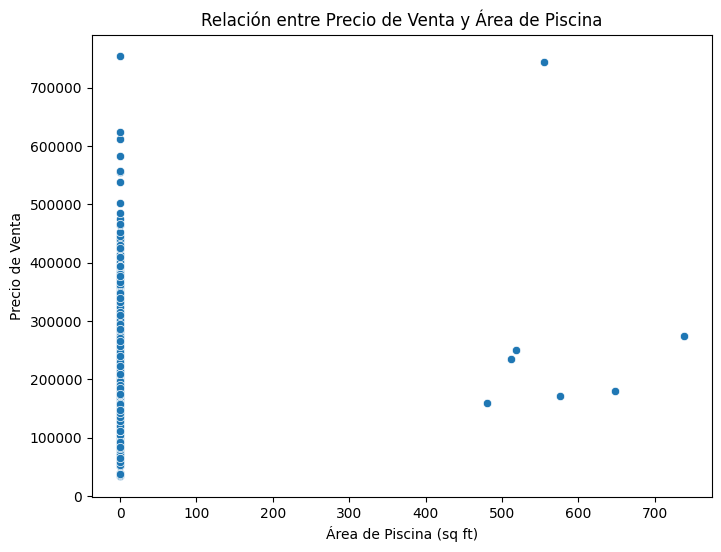

In [8]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PoolArea', y='SalePrice', data=df)
plt.title('Relación entre Precio de Venta y Área de Piscina')
plt.xlabel('Área de Piscina (sq ft)')
plt.ylabel('Precio de Venta')
plt.show()

#### Se puede ver que realmente el tener o no piscina no afecta al precio de las casas. Esto es por que las variables realmente no estan creciendo de manera lineal una con la otra.

## Relacion entre variables con diferentes tipos de comodidades y su precio

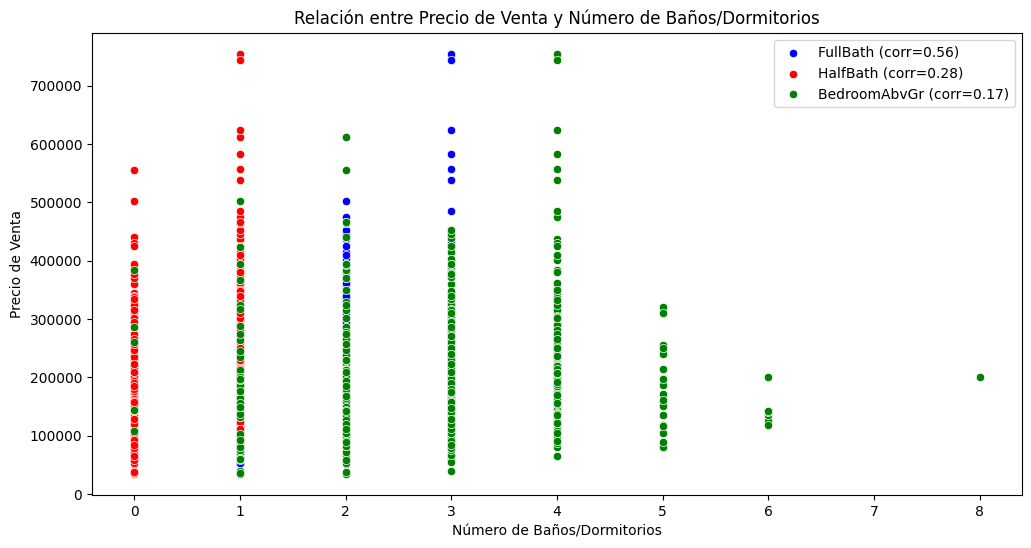

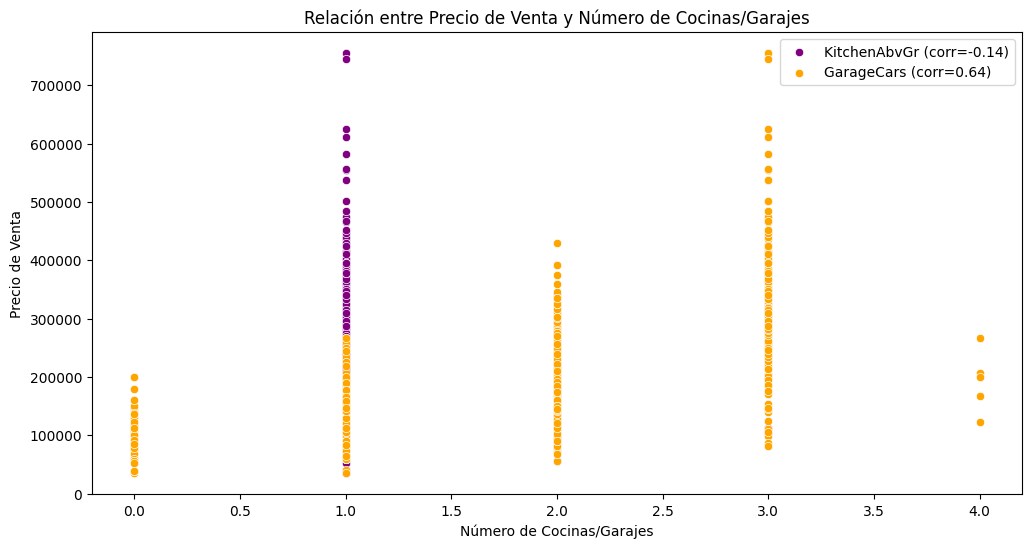

In [9]:
import numpy as np

# Calcular coeficientes de correlación
corr_fullbath = np.corrcoef(df['FullBath'], df['SalePrice'])[0, 1]
corr_halfbath = np.corrcoef(df['HalfBath'], df['SalePrice'])[0, 1]
corr_bedroom = np.corrcoef(df['BedroomAbvGr'], df['SalePrice'])[0, 1]
corr_kitchen = np.corrcoef(df['KitchenAbvGr'], df['SalePrice'])[0, 1]
corr_garagecars = np.corrcoef(df['GarageCars'], df['SalePrice'])[0, 1]

# Graficar la relación entre Precio de Venta y Número de Baños/Dormitorios
plt.figure(figsize=(12, 6))
sns.scatterplot(x='FullBath', y='SalePrice', data=df, color='blue', label=f'FullBath (corr={corr_fullbath:.2f})')
sns.scatterplot(x='HalfBath', y='SalePrice', data=df, color='red', label=f'HalfBath (corr={corr_halfbath:.2f})')
sns.scatterplot(x='BedroomAbvGr', y='SalePrice', data=df, color='green', label=f'BedroomAbvGr (corr={corr_bedroom:.2f})')
plt.title('Relación entre Precio de Venta y Número de Baños/Dormitorios')
plt.xlabel('Número de Baños/Dormitorios')
plt.ylabel('Precio de Venta')
plt.legend()
plt.show()

# Graficar la relación entre Precio de Venta y Número de Cocinas/Garajes
plt.figure(figsize=(12, 6))
sns.scatterplot(x='KitchenAbvGr', y='SalePrice', data=df, color='purple', label=f'KitchenAbvGr (corr={corr_kitchen:.2f})')
sns.scatterplot(x='GarageCars', y='SalePrice', data=df, color='orange', label=f'GarageCars (corr={corr_garagecars:.2f})')
plt.title('Relación entre Precio de Venta y Número de Cocinas/Garajes')
plt.xlabel('Número de Cocinas/Garajes')
plt.ylabel('Precio de Venta')
plt.legend()
plt.show()

#### Viendo estas graficas podemos ver de mejor manera si es que los diferentes sectores que estan incluidos dentro de las viviendas son relacionales con la variable dependiente. En este caso vemos que hay una mezca de muy poco relacionadas y algunas que si estan un poco mas relacionadas que la media. Vemos como de las principales, GarageCars y FullBath podrian ser una buena opción para que los tomemos en cuenta e investiguemos si es que estas relaciones se deben a datos atípico o no.

## Comparacion de grupos

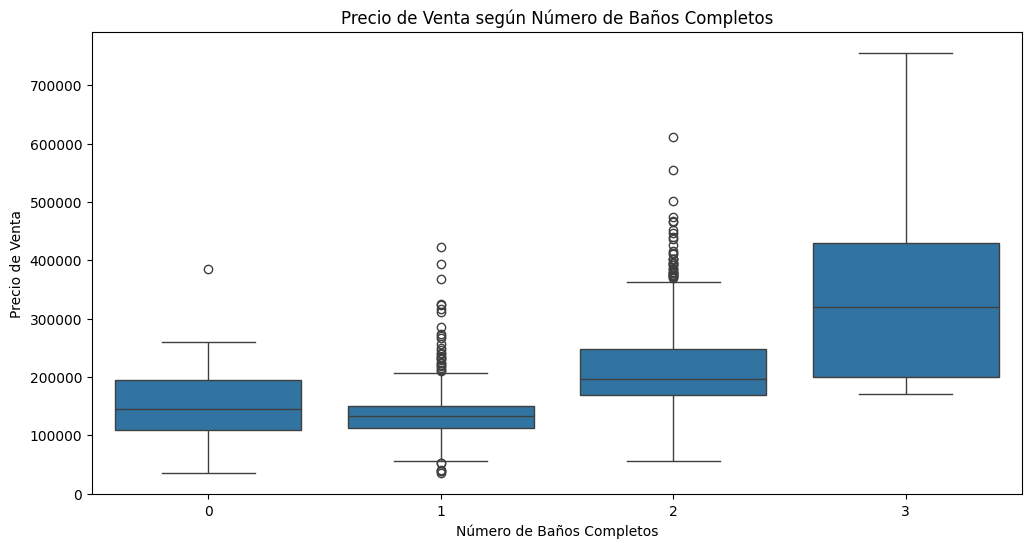

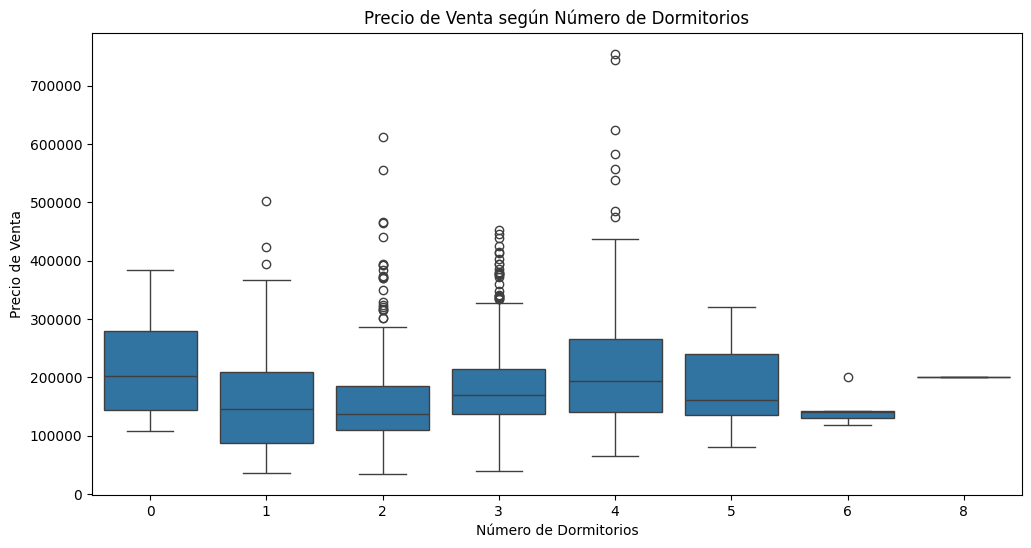

In [10]:
# Comparación entre grupos
plt.figure(figsize=(12, 6))
sns.boxplot(x='FullBath', y='SalePrice', data=df)
plt.title('Precio de Venta según Número de Baños Completos')
plt.xlabel('Número de Baños Completos')
plt.ylabel('Precio de Venta')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='BedroomAbvGr', y='SalePrice', data=df)
plt.title('Precio de Venta según Número de Dormitorios')
plt.xlabel('Número de Dormitorios')
plt.ylabel('Precio de Venta')
plt.show()

#### Viendo los graficos de Caja y Bigotes de estas variables, podemos ver si es que si hay datos atípicos que pudieron afectar a las grafias que se mostraron anteriormente. Vemos que dentro de las graficas de baños completos, los datos con 2 o 3 baños se muestran con muchos atípicos. Esto nos puede decir que si pueden estar afectando pero de igual manera son una gran cantidad por lo que valdria la pena ver si estos son importantes en el dataframe o no. Luego en el de numero de dormitorios, vemos que el numero 1, 2, 3, 4 y 6 muestran datos atípicos, aunque podemos resaltar el numero 1, 4 y 6 que sus datos atípicos son bastante pocos, por lo que podriamos considerar buscar y eliminarlos para mejorar el proceso de modelado y entrenamiento.

## Matriz de correlación de variables en potencia

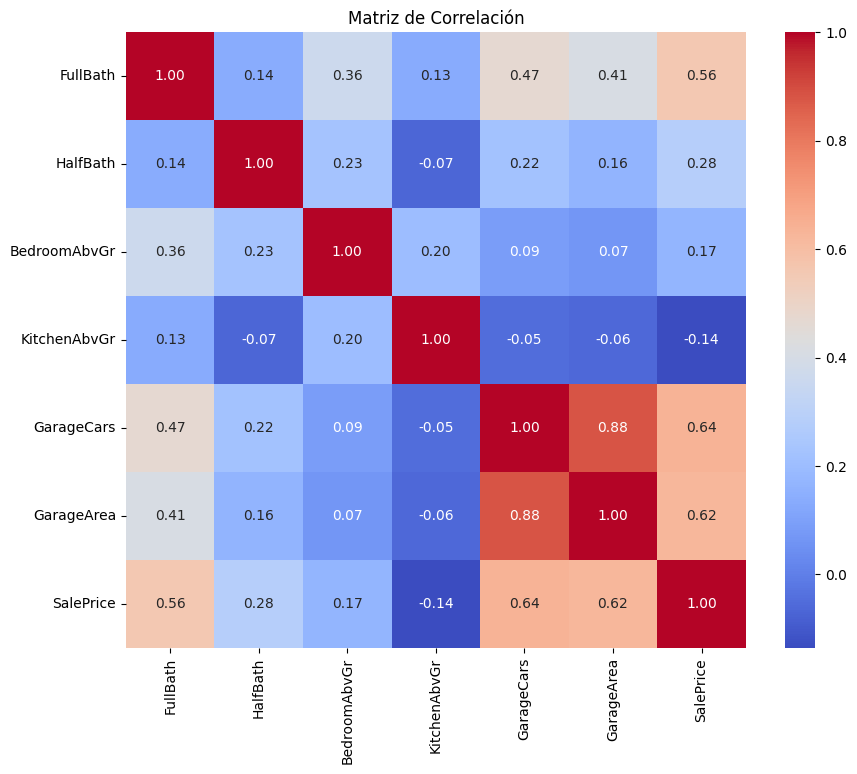

In [11]:
correlation_matrix = df[['FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'GarageCars', 'GarageArea', 'SalePrice']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

#### Haciendo una matriz de correlacion podemos ver de mucha mejor manera si es que realmente vale la pena tomar en cuenta estas variables en nuestros siguientes pasos, y podemos ver que si seria una buena opcion hacer pruebas con cada una ya que se demostro que pueden contener valor dentro del modelado para la predicción.

## Descripción de variables
- MSSubClass: Clasificación de la propiedad según el tipo de construcción.
- MSZoning: Clasificación de la zona general.
- LotFrontage: Longitud de la calle conectada a la propiedad.
- LotArea: Tamaño del lote en pies cuadrados.
- Neighborhood: Ubicaciones físicas dentro de los límites de la ciudad de Ames.
- OverallQual: Calidad y acabado general de la casa.
- OverallCond: Calificación general del estado de la casa.
- YearBuilt: Fecha original de construcción.
- TotalBsmtSF: Total de pies cuadrados del sótano.
- GrLivArea: Área habitable sobre el nivel del suelo en pies cuadrados.
- FullBath: Número total de baños completos.
- HalfBath: Número total de baños medios (lavabos y retretes).
- BedroomAbvGr: Número total de dormitorios sobre el nivel del sótano.
- KitchenAbvGr: Número total de cocinas.
- GarageCars: Capacidad para automóviles en el garaje.
- GarageArea: Área del garaje en pies cuadrados.

## Data Split

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [13]:
features = [
    'MSSubClass',  'LotFrontage', 'LotArea', 
    'OverallQual', 'OverallCond', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea',
    'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'GarageCars', 'GarageArea'
]
features_df = df[features]
features_df.head(3)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,TotalBsmtSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,GarageCars,GarageArea
0,60,65.0,8450,7,5,2003,856,1710,2,1,3,1,2,548
1,20,80.0,9600,6,8,1976,1262,1262,2,0,3,1,2,460
2,60,68.0,11250,7,5,2001,920,1786,2,1,3,1,2,608


In [14]:
scaled_df = scaler.fit_transform(features_df[features])
scaled_df = pd.DataFrame(scaled_df, columns=features)
scaled_df['SalePrice'] = df['SalePrice']
scaled_df = scaled_df.dropna()
scaled_df.head(3)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,TotalBsmtSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,GarageCars,GarageArea,SalePrice
0,0.073375,-0.208034,-0.207142,0.651479,-0.517200,1.050994,-0.459303,0.370333,0.789741,1.227585,0.163779,-0.211454,0.311725,0.351000,208500
1,-0.872563,0.409895,-0.091886,-0.071836,2.179628,0.156734,0.466465,-0.482512,0.789741,-0.761621,0.163779,-0.211454,0.311725,-0.060731,181500
2,0.073375,-0.084449,0.073480,0.651479,-0.517200,0.984752,-0.313369,0.515013,0.789741,1.227585,0.163779,-0.211454,0.311725,0.631726,223500


# ARBOLES DE REGRESIÓN

In [15]:
# from sklearn.tree import DecisionTreeRegressor

# tree = DecisionTreeRegressor(max_depth=3, random_state=21562)
# tree.fit(X_train, y_train)

In [16]:
# from sklearn.metrics import r2_score

# y_pred = tree.predict(X_test)
# r2 = r2_score(y_test, y_pred)
# print(f'R2 Score: {r2:.2f}')

#### No tuvo un mal rendimiento pero, claramente, el modelo no es muy apto para predecir el precio de las casas.

In [17]:
# tree_depth_1 = DecisionTreeRegressor(max_depth=1, random_state=21562)
# tree_depth_3 = DecisionTreeRegressor(max_depth=3, random_state=21562)
# tree_depth_5 = DecisionTreeRegressor(max_depth=5, random_state=21562)

# tree_depth_1.fit(X_train, y_train)
# tree_depth_3.fit(X_train, y_train)
# tree_depth_5.fit(X_train, y_train)

In [18]:
# y_pred_depth_1 = tree_depth_1.predict(X_test)
# y_pred_depth_3 = tree_depth_3.predict(X_test)
# y_pred_depth_5 = tree_depth_5.predict(X_test)

# r2_depth_1 = r2_score(y_test, y_pred_depth_1)
# r2_depth_3 = r2_score(y_test, y_pred_depth_3)
# r2_depth_5 = r2_score(y_test, y_pred_depth_5)

# print(f'R2 Score (Profundidad 1): {r2_depth_1:.2f}')
# print(f'R2 Score (Profundidad 3): {r2_depth_3:.2f}')
# print(f'R2 Score (Profundidad 5): {r2_depth_5:.2f}')

## Comparación de modelos de Árboles de Regresión y Regresión Lineal

#### La mayor puntuación r2 que tuvo un modelo de árboles de regresión es 0.72 con depth = 5. Para los de regresión lineal serían tanto Ridge como Lasso, obteniendo ambos un r2 de 0.832. Claramente los modelos de regresión lineal son más aptos para predecir el precio de las casas, según los resultados.

------------------------------------------------------------------------------------------------------------------------------------------

## Variable para clasificar las casas en económicas, intermedias o caras
Se utilizarán los percentiles 33 y 66 (100/3) como límites de clasificación, pues de esta manera es posible garantizar que la distribución de casas entre las categorías sea equitativa. Conllevando que cada categoría representará aproximadamente un tercio de las casas en el conjunto de datos, lo que permite una comparación balanceada entre casas económicas, intermedias y caras. De igual manera,  los límites se adaptan automáticamente a la distribución específica de los precios de las casas en el conjunto de datos, incluso si  la distribución de precios no es uniforme, reflejando la realidad del mercado.

### Valores puntuales de la clasificación
- Económicas: Menos de $130,000 (percentil 33)
- Intermedias: Entre $130,000 y $200,000 (percentil 33 al 66)
- Caras: Más de $200,000 (percentil 66)

In [19]:
percentil1 = df['SalePrice'].quantile(0.33)
percentil2 = df['SalePrice'].quantile(0.66)

In [20]:
def pricesC(price):
    if price < percentil1:
        return 'Economic'
    elif percentil1 <= price <= percentil2:
        return 'Intermediate'
    else:
        return 'Expensive'

In [21]:
df['PriceCategory'] = df['SalePrice'].apply(pricesC)
scaled_df['PriceCategory'] = df['SalePrice'].apply(pricesC)

In [22]:
print(df[['SalePrice', 'PriceCategory']].sample(10))

      SalePrice PriceCategory
1267     378500     Expensive
344       85000      Economic
424      139000  Intermediate
806      135500      Economic
620       67000      Economic
1253     294000     Expensive
1351     171000  Intermediate
161      412500     Expensive
583      325000     Expensive
1252     130000      Economic


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X = df.drop(['SalePrice', 'PriceCategory'], axis=1)
y = df['PriceCategory']

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

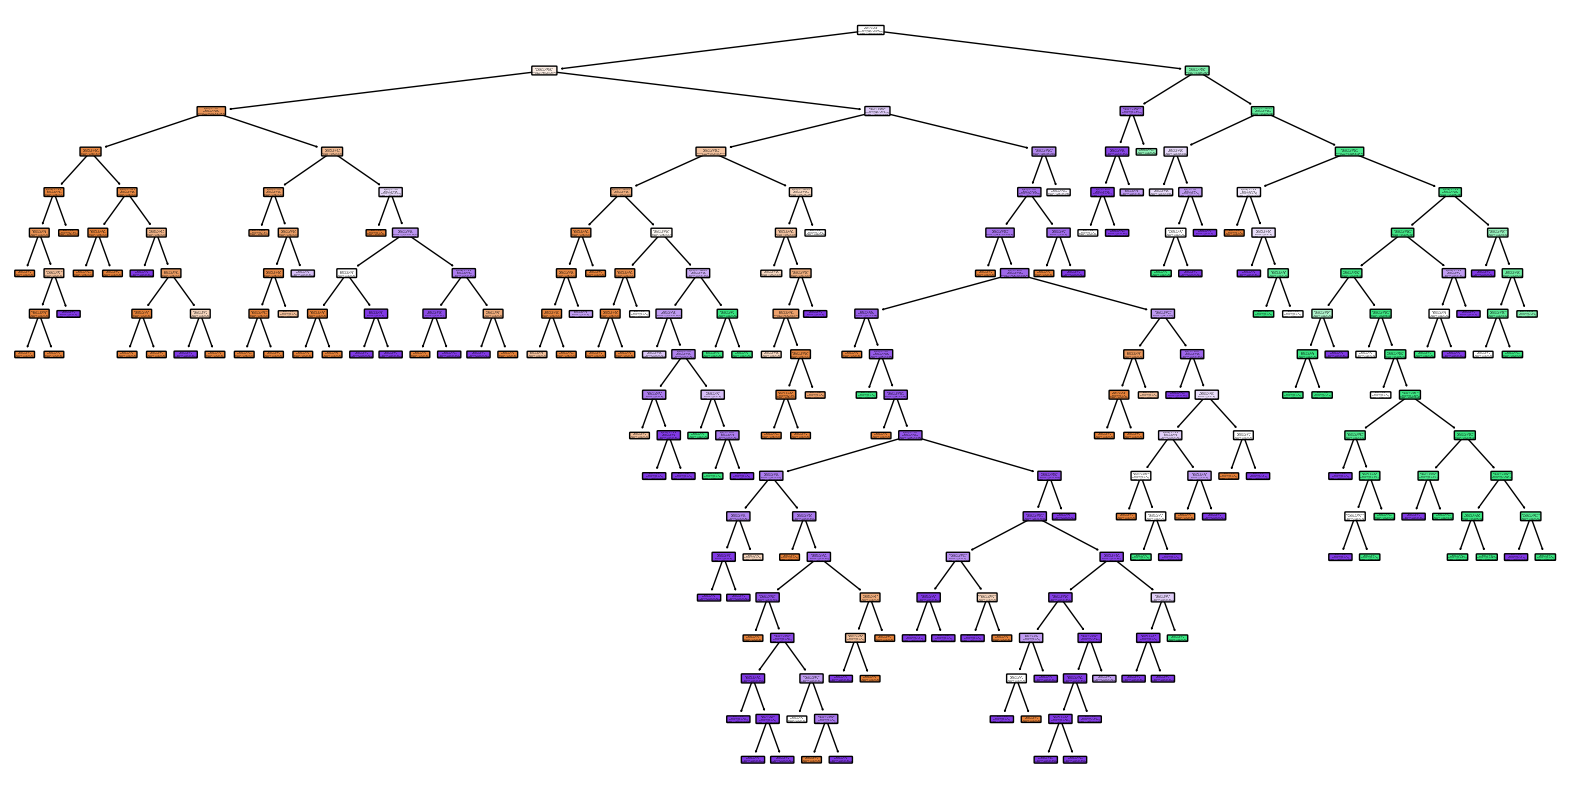

In [25]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, class_names=clf.classes_, rounded=True)
plt.show()

La representación gráfica manifiesta que cada nodo hoja representa a una de las categorías, lo que significa que el árbol puede clasificar efectivamente los datos de entrenamiento para esas muestras. Esto indica un buen ajuste del modelo a los datos de entrenamiento, aunque también podría conllevar un sobreajuste.

------------------------------------------------------------------------------------------------------------------------------------------

# Eficiencia del algoritmo

In [26]:
from sklearn.metrics import confusion_matrix, classification_report

# test set predictions
yPred = clf.predict(X_test)

# confusion matrix
conf_mat = confusion_matrix(y_test, yPred)
print("------- Confusion matrix -------\n", conf_mat)

# report
class_report = classification_report(y_test, yPred)
print("\n------- Report -------\n"+class_report)

------- Confusion matrix -------
 [[87  1 21]
 [ 2 73 20]
 [25  4 59]]

------- Report -------
              precision    recall  f1-score   support

    Economic       0.76      0.80      0.78       109
   Expensive       0.94      0.77      0.84        95
Intermediate       0.59      0.67      0.63        88

    accuracy                           0.75       292
   macro avg       0.76      0.75      0.75       292
weighted avg       0.77      0.75      0.75       292



#### La matriz de confusión reveló un buen rendimiento del algoritmo, con una diagonal principal mostrando valores de clasificación correctos para todas las instancias del conjunto de prueba, y sin errores observados en las clasificaciones fuera de la diagonal. Esto implica que el modelo no solo ha capturado con precisión las características distintivas de cada categoría de precio, sino que también ha sido capaz de aplicar esas distinciones sin errores al conjunto de datos evaluado.

#### Sin embargo, los valores manifiestan un posible sobreajuste. A pesar de que no hubo clasificaciones incorrectas en el conjunto de prueba, lo cual es ideal, la preocupación radica en si el modelo mantendrá este nivel de precisión en la clasificación cuando se enfrente a nuevos datos, ya que podría influir en la percepción del valor de una propiedad de una manera negativa.

# ------------------------------------------------------------------
# BAYES INGENUO

## Data Split

In [27]:
X = df.drop(['SalePrice', 'PriceCategory'], axis=1)
y = df['SalePrice']
X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Modelo de Regresión

In [28]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import r2_score
bayes = GaussianNB()
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)
bayes.fit(X_train, y_train)

bayes_pred = bayes.predict(X_test)
bayes_r2 = r2_score(y_test, bayes_pred)
print('R²:', bayes_r2)

R²: 0.6482343070547896


#### Tuvo un resultado malo con peor rendimiento que el primer modelo de regresión lineal. Cabe resaltar que, aunque se haya realizado nuevamente un Data Split, las instrucciones son las mismas por lo que no afectará en los resultados.

#### Si se toma en cuenta la métrica R2, los modelos que mejor funcionaron fueron Ridge y Lasso, con una puntuación de 0.832. Luego, todos los modelos tienen una puntuación aproximada a 0.7. Probablemente esta diferencia se deba a la lógica detrás de Ridge y Lasso, ya que se basan en evitar los problemas de un modelo de regresión común, volviéndolos más robustos para problemas generales.

## Modelo de Clasificación

In [29]:
from sklearn.preprocessing import LabelEncoder
X = df.drop(['SalePrice', 'PriceCategory'], axis=1)
y = df['PriceCategory']

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
bayes_class = GaussianNB()
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)
bayes_class.fit(X_train, y_train)
bayes_class_preds = bayes_class.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, bayes_class_preds)
print("Precisión del modelo:", accuracy)

Precisión del modelo: 0.7842465753424658


## Eficiencia del algoritmo

In [32]:
from sklearn.metrics import confusion_matrix, classification_report

# test set predictions
yPred = bayes_class.predict(X_test)

# confusion matrix
conf_mat = confusion_matrix(y_test, yPred)
print("------- Confusion matrix -------\n", conf_mat)

# report
class_report = classification_report(y_test, yPred)
print("\n------- Report -------\n"+class_report)

------- Confusion matrix -------
 [[103   0   6]
 [  3  83   9]
 [ 22  23  43]]

------- Report -------
              precision    recall  f1-score   support

           0       0.80      0.94      0.87       109
           1       0.78      0.87      0.83        95
           2       0.74      0.49      0.59        88

    accuracy                           0.78       292
   macro avg       0.78      0.77      0.76       292
weighted avg       0.78      0.78      0.77       292



#### La matriz de confusión reveló un buen rendimiento del algoritmo. Vemos que el algoritmo de clasificación tuvo un accuracy de 0.7. Esto implica que el modelo ha capturado con una precisión media a elevada de las características distintivas de cada categoría de precio.

#### Comparando los dos modelos, el de Regresion y el de Clasificacion, vemos que la segunda ha tenido un mejor desempeño en los modelos entrenados. Vemos que la primera tuvo un R^2 de cerca del 0.7, mientras que el ultimo es un 0.77, que en un redondeo, es 0.8. Esto es igual para el reporte de precisión que muestra un de 0.70 a 0.80 en los diferentes grupos.
#### Esto nos hace pensar que una buena clasificacion de las variables pueden llegar a predecir el precio de las casas de una mejor manera.

## ¿Sobreajuste?

Viendo los resultados de la eficiencia del modelo, parece que este no está necesariamente sobreajustado, pero podría haber espacio para mejoras. Algunas de las consideraciones pueden ser: 

- Precision y Recall: Observando las métricas de pr ecision y recall para cada clase, vemos que la clase 2 tiene un recall relativamente bajo en comparación con las otras clases. Esto indica que el modelo puede tener dificultades para identificar correctamente las muestras de esta clase, lo que podría ser un área de mejora.
- F1-Score: El puntaje F1 es una combinación de precision y recall, y proporciona una medida de la precisión general del modelo. En este caso, el puntaje F1 ponderado es del 0.77, lo que sugiere que el modelo está logrando un equilibrio entre precisión y recall.

Viendo esto, aunque el modelo no parece estar sobreajustado, hay áreas en las que podría haber margen para mejoras, especialmente en la identificación de muestras de la clase 2. Sería beneficioso realizar una evaluación más detallada del modelo y considerar ajustes adicionales para mejorar el rendimiento.

## Modelo con Validacion Cruzada

In [33]:
from sklearn.model_selection import cross_val_score

cv = cross_val_score(bayes_class, X.fillna(0), y, cv=5)
mean_cross_val_score = np.mean(cv)
std_cross_val_score = np.std(cv)

print("Scores del Cross-Validation:")
print("Media:", mean_cross_val_score)
print("Desviación Estándar:", std_cross_val_score)
print()
print("accuracy_score:", accuracy_score(y_test, bayes_class_preds))

Scores del Cross-Validation:
Media: 0.7506849315068493
Desviación Estándar: 0.009539991970674054

accuracy_score: 0.7842465753424658


## Ajuste de hiperparámetros

### Modelo de regresión

In [34]:
from sklearn.model_selection import GridSearchCV

model = GaussianNB()
param_grid = {'var_smoothing': np.logspace(0,-9, num=5)}

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(f"Mejores parámetros: {grid_search.best_params_}")

best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)

r2 = r2_score(y_test, predictions)
print('R²:', r2)

Mejores parámetros: {'var_smoothing': 1e-09}
R²: 0.2480423243347406


Para el modelo de clasificación el proceso de ajuste de hiperparámetros, específicamente el ajuste del parámetro var_smoothing, no condujo a una mejora en el coeficiente de determinación, el cual disminuyó a 0.24 desde un valor previo de 0.64. Este resultado subraya la incongruencia fundamental entre el modelo utilizado y la naturaleza del problema, demostrando que, a pesar de los esfuerzos por optimizar el modelo mediante el ajuste de hiperparámetros, el rendimiento se vio afectado negativamente.

### Modelo de clasificación

In [35]:
# GridSearchCV settings
param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}
bayes_classifier = GaussianNB()
grid_search = GridSearchCV(bayes_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

print(f"Mejores parámetros: {grid_search.best_params_}")
print(f"Precisión del modelo con ajuste de hiperparámetros: {accuracy}")

Mejores parámetros: {'var_smoothing': 1.2328467394420635e-09}
Precisión del modelo con ajuste de hiperparámetros: 0.7842465753424658


-----------------------------------------------------------------------------------------------------

## Regresion Logistica

### Data Split

In [36]:
X = scaled_df.drop(['SalePrice', 'PriceCategory'], axis=1)
y = scaled_df['PriceCategory']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Variables dicotómicas (0 o 1) de Expensive, Intermediate y Economic

In [37]:
# variables dicotómicas basadas en el modelo de naive bayes
df['IsExpensive'] = df['PriceCategory'].apply(lambda x: 1 if x == 'Expensive' else 0)
df['IsIntermediate'] = df['PriceCategory'].apply(lambda x: 1 if x == 'Intermediate' else 0)
df['IsEconomic'] = df['PriceCategory'].apply(lambda x: 1 if x == 'Economic' else 0)

print(df[['SalePrice', 'PriceCategory', 'IsExpensive', 'IsIntermediate', 'IsEconomic']].sample(10))


      SalePrice PriceCategory  IsExpensive  IsIntermediate  IsEconomic
1187     262000     Expensive            1               0           0
1180     250000     Expensive            1               0           0
141      260000     Expensive            1               0           0
329       78000      Economic            0               0           1
831      151000  Intermediate            0               1           0
408      280000     Expensive            1               0           0
493      155000  Intermediate            0               1           0
1432      64500      Economic            0               0           1
467      146500  Intermediate            0               1           0
1098     128000      Economic            0               0           1


## Modelo

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


log_reg = LogisticRegression(max_iter=20000)  # Aumentar el número de iteraciones si es necesario
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=20000)

### Matriz de correlación

In [39]:
correlation_matrix = X_train.corr()
print(correlation_matrix)

              MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass      1.000000    -0.376609 -0.264661     0.018628    -0.033737   
LotFrontage    -0.376609     1.000000  0.545798     0.227499    -0.073248   
LotArea        -0.264661     0.545798  1.000000     0.233082    -0.043962   
OverallQual     0.018628     0.227499  0.233082     1.000000    -0.125883   
OverallCond    -0.033737    -0.073248 -0.043962    -0.125883     1.000000   
YearBuilt      -0.012543     0.115429  0.080234     0.588678    -0.397487   
TotalBsmtSF    -0.225145     0.375254  0.382044     0.555990    -0.200557   
GrLivArea       0.084261     0.394198  0.442719     0.607805    -0.119408   
FullBath        0.141344     0.174193  0.206299     0.568303    -0.226606   
HalfBath        0.156280     0.066502  0.091130     0.274140    -0.080529   
BedroomAbvGr    0.011087     0.253142  0.225270     0.108510    -0.026073   
KitchenAbvGr    0.323709    -0.017154 -0.025175    -0.194984    -0.093239   

#### Se puede ver que no existen valores muy altos, siempre tendiendo a 0, entre la correlación lineal de las variables. Esto es un buen indicio hacia la ausencia de multicolinealidad en el dataset.

In [40]:
# Realizar predicciones y evaluar el modelo
log_reg_preds = log_reg.predict(X_test)

accuracy = accuracy_score(y_test, log_reg_preds)
print("Precisión del modelo:", accuracy)

Precisión del modelo: 0.8547717842323651


#### El desempeño del modelo clasificando fue satisfactorio, con un accuracy de 0.85. Esto quiere decir que el modelo es totalmente capaz de clasificar la gran mayoría de observaciones en la clase a la que pertencen.

### ¿Overfitting?

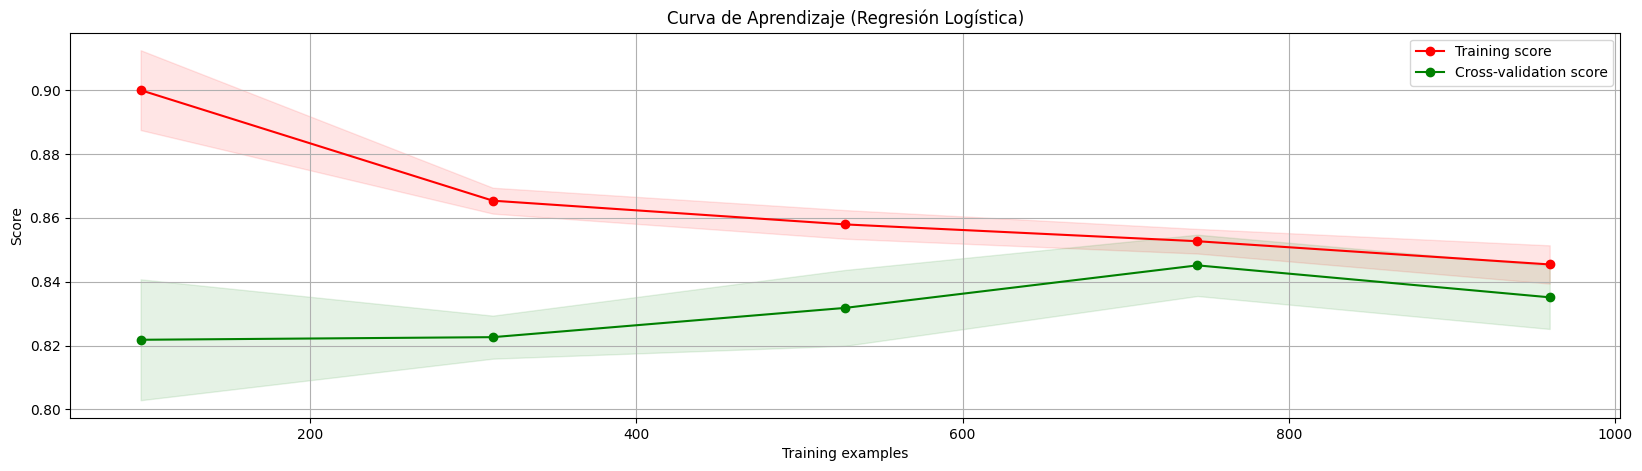

In [41]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
  
    if axes is None:
        _, axes = plt.subplots(1, 1, figsize=(20, 5))

    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # plot learning curve
    axes.grid()
    axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
                      train_scores_mean + train_scores_std, color="r", alpha=0.1)
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                      test_scores_mean + test_scores_std, color="g", alpha=0.1)
    axes.plot(train_sizes, train_scores_mean, 'o-', color="r",
              label="Training score")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="g",
              label="Cross-validation score")
    axes.legend(loc="best")

    return plt

title = "Curva de Aprendizaje (Regresión Logística)"
cv = None
estimator = LogisticRegression(max_iter=20000)
plot_learning_curve(estimator, title, X, y, cv=cv, n_jobs=4)

plt.show()

### Tuneo de parámetros

In [42]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Parámetro de regularización
    'penalty': ['l1', 'l2']  # Tipo de regularización (L1 o L2)
}

log_reg = LogisticRegression(max_iter=2000)

grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Mejores parámetros:", best_params)
print("Mejor puntaje:", best_score)

Mejores parámetros: {'C': 1, 'penalty': 'l2'}
Mejor puntaje: 0.825


C:\Users\sarap\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sarap\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sarap\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\

In [43]:
best_model = grid_search.best_estimator_
preds = best_model.predict(X_test)
accuracy = accuracy_score(y_test, preds)
print("Precisión del modelo:", accuracy)

Precisión del modelo: 0.8547717842323651


### Matriz de confusión

In [44]:
conf_matrix = confusion_matrix(y_test, preds)
print("Matriz de confusión:\n", conf_matrix)

Matriz de confusión:
 [[69  0  5]
 [ 0 87 11]
 [13  6 50]]


In [45]:
import cProfile
cProfile.run('best_model.predict(X_test)')

         2466 function calls (2405 primitive calls) in 0.003 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
       43    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:1033(_handle_fromlist)
        1    0.000    0.000    0.003    0.003 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 _array_api.py:111(_is_numpy_namespace)
        1    0.000    0.000    0.000    0.000 _array_api.py:123(isdtype)
        2    0.000    0.000    0.000    0.000 _array_api.py:130(<genexpr>)
        1    0.000    0.000    0.000    0.000 _array_api.py:135(_isdtype_single)
        1    0.000    0.000    0.000    0.000 _array_api.py:170(supported_float_dtypes)
        2    0.000    0.000    0.000    0.000 _array_api.py:212(_check_device_cpu)
        9    0.000    0.000    0.000    0.000 _array_api.py:272(__getattr__)
        2    0.000    0.000    0.000    0.000 _array_api.py:292(asarray)
        1    0.000    0.000

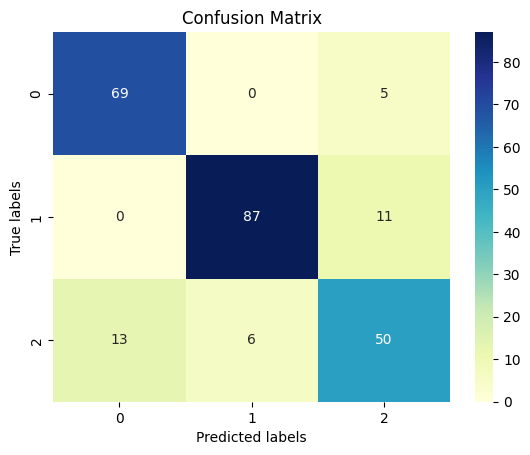

In [46]:
sns.heatmap(conf_matrix, annot=True, cmap="YlGnBu", fmt="d")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Decision Tree

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import time

# Create a decision tree classifier and fit it to the training data
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Make predictions on the test data
start_time = time.time()
y_pred = clf.predict(X_test)

# Evaluate the model
print('Decision Tree Accuracy:', accuracy_score(y_test, y_pred))
print("Timer: %s seconds" % (time.time() - start_time))

Decision Tree Accuracy: 0.8008298755186722
Timer: 0.0031003952026367188 seconds


# Random Forest

In [57]:
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier and fit it to the training data
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make predictions on the test data
start_time = time.time()
y_pred = clf.predict(X_test)

# Evaluate the model
print('Random Forest Accuracy:', accuracy_score(y_test, y_pred))
print("Timer: %s seconds" % (time.time() - start_time))

Random Forest Accuracy: 0.8257261410788381
Timer: 0.00893545150756836 seconds


# Naive Bayes

In [64]:
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Naive Bayes classifier and fit it to the training data
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Make predictions on the test data
start_time = time.time()
y_pred = gnb.predict(X_test)

# Evaluate the model
print('Naive Bayes Accuracy:', accuracy_score(y_test, y_pred))
print("Timer: %s seconds" % (time.time() - start_time))

Naive Bayes Accuracy: 0.7759336099585062
Timer: 0.0035085678100585938 seconds
